### Evaluate Your Model

In Machine Learning we create models to predict the outcome of certain events, like in the previous chapter where we predicted the CO2 emission of a car when we knew the weight and engine size.

To measure if the model is good enough, we can use a method called Train/Test.

### What is Train/Test

Train/Test is a method to measure the accuracy of your model.

It is called Train/Test because you split the the data set into two sets: a training set and a testing set.

80% for training, and 20% for testing.

You train the model using the training set.

You test the model using the testing set.

Train the model means create the model.

Test the model means test the accuracy of the model.

### Start With a Data Set

Start with a data set you want to test.

Our data set illustrates 100 customers in a shop, and their shopping habits.

In [1]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100) # Mean value is 3, standard deviation is 1, give me 100 normally distributed values.
y = numpy.random.normal(150, 40, 100) / x # Mean value is 150, standard deviation is 40, give me 100 normally distributed values.
                                        # Be aware of "/x" part at the end!
#print (x)
#print (y)
    
plt.scatter(x, y)
plt.show()

#The seed() method is used to initialize the random number generator.
#The random number generator needs a number to start with (a seed value), to be able to generate a random number.
#By default the random number generator uses the current system time.
#Use the seed() method to customize the start number of the random number generator.
#Note: If you use the same seed value twice you will get the same random number twice.

<Figure size 640x480 with 1 Axes>

### Result:

The x axis represents the number of minutes before making a purchase.

The y axis represents the amount of money spent on the purchase.

### Split Into Train/Test

The training set should be a random selection of 80% of the original data.

The testing set should be the remaining 20%.

In [2]:
train_x = x[:80] # https://openbookproject.net/thinkcs/python/english3e/lists.html
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

### Display the Training Set

Display the same scatter plot with the training set:

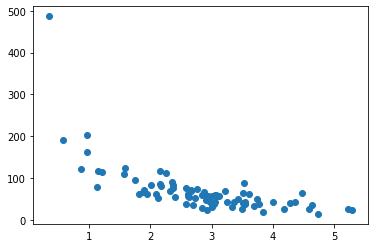

In [3]:
plt.scatter(train_x, train_y)
plt.show() # The result looks like the original data set, so it seems to be a fair selection.

### Display the Testing Set

To make sure the testing set is not completely different, we will take a look at the testing set as well.

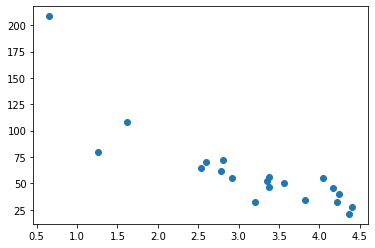

In [4]:
plt.scatter(test_x, test_y)
plt.show() # Result of the testing set also looks like the original data set.

### Fit the Data Set

What does the data set look like? The best fit would be a polynomial regression, so let us draw a line of polynomial regression.

To draw a line through the data points, we use the plot() method of the matplotlib module:

Draw a polynomial regression line through the data points.

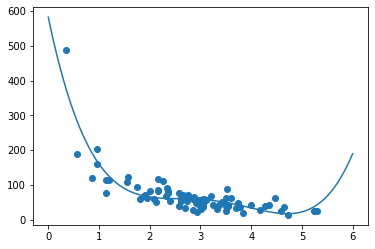

In [5]:
mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

myline = numpy.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()

The result can back the suggestion of the data set fitting a polynomial regression, even though it would give us some weird results if we try to predict values outside of the data set. Example: the line indicates that a customer spending 6 minutes in the shop would make a purchase worth 200. That is probably a sign of overfitting.

But what about the R-squared score? The R-squared score is a good indicator of how well my data set is fitting the model.

### R2
Remember R2, also known as R-squared?

It measures the relationship between the x axis and the y axis, and the value ranges from 0 to 1, where 0 means no relationship, and 1 means totally related.

The sklearn module has a method called r2_score() that will help us find this relationship.

In this case we would like to measure the relationship between the minutes a customer stays in the shop and how much money they spend.

### Example
How well does my training data fit in a polynomial regression?

In [6]:
from sklearn.metrics import r2_score

r2 = r2_score(train_y, mymodel(train_x))

print(r2)

0.7988645544629795


Note that the result 0.799 shows that there is a OK relationship.

### Bring in the Testing Set

Now we have made a model that is OK, at least when it comes to training data.

Now we want to test the model with the testing data as well, to see if gives us the same result.

### Example

Let us find the R2 score when using testing data:

In [7]:
r2_test = r2_score(test_y, mymodel(test_x))

print(r2_test)

0.8086921460343696


Note that the result 0.809 shows that the model fits the testing set as well, and we are confident that we can use the model to predict future values.

### Predict Values

Now that we have established that our model is OK, we can start predicting new values.

### Example: 
How much money will a buying customer spend, if she or he stays in the shop for 5 minutes?

In [8]:
print("The customer will spend", mymodel(5), "$. if she or he stays in the shop for 5 minutes")

The customer will spend 22.87962591812243 $. if she or he stays in the shop for 5 minutes


The example predicted the customer to spend 22.88 dollars, as seems to correspond to the diagram.